<a href="https://colab.research.google.com/github/kingajutrzenka/correlation-between-posture-MBTI-analysis/blob/main/%E2%80%A6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Correlation between Posture & Personality Trait

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import plotly.express as px
import plotly.graph_objects as go

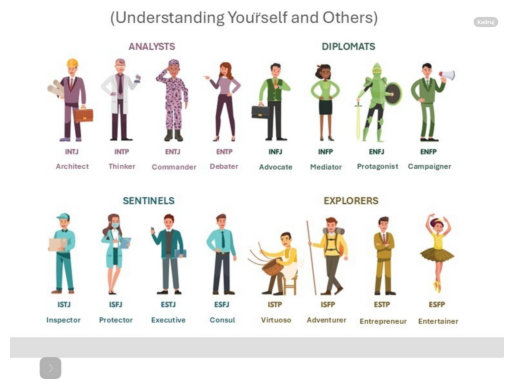

In [ ]:
img = mpimg.imread("IMG_7647.png")
plt.imshow(img)
plt.axis('off')
plt.show()

# Data cleaning

In [ ]:
df = pd.read_csv("Myers Briggs Table_S1.csv")
df.head()

,S No,AGE,HEIGHT,WEIGHT,SEX,ACTIVITY LEVEL,PAIN 1,PAIN 2,PAIN 3,PAIN 4,MBTI,E,I,S,N,T,F,J,P,POSTURE
0,1,53,62,125,Female,Low,0.0,0.0,0.0,0.0,ESFJ,18,3,17,9,9,13,18,4,A
1,2,52,69,157,Male,High,7.0,8.0,5.0,3.0,ISTJ,6,15,14,12,21,3,13,9,B
2,3,30,69,200,Male,High,0.0,0.0,0.0,0.0,ESTJ,15,6,16,10,15,9,12,10,A
3,4,51,66,175,Male,Moderate,9.5,9.5,9.5,1.5,ISTJ,6,15,21,5,13,11,19,3,D
4,5,45,63,199,Female,Moderate,4.0,5.0,2.0,2.0,ENFJ,14,7,20,6,9,15,16,6,A


In [ ]:
if 'AGE' in df.columns:
    del df['AGE']
if 'WEIGHT' in df.columns:
    del df['WEIGHT']
if 'SEX' in df.columns:
    del df['SEX']
if 'S No' in df.columns:
    del df['S No']
df.head()

,HEIGHT,ACTIVITY LEVEL,PAIN 1,PAIN 2,PAIN 3,PAIN 4,MBTI,E,I,S,N,T,F,J,P,POSTURE
0,62,Low,0.0,0.0,0.0,0.0,ESFJ,18,3,17,9,9,13,18,4,A
1,69,High,7.0,8.0,5.0,3.0,ISTJ,6,15,14,12,21,3,13,9,B
2,69,High,0.0,0.0,0.0,0.0,ESTJ,15,6,16,10,15,9,12,10,A
3,66,Moderate,9.5,9.5,9.5,1.5,ISTJ,6,15,21,5,13,11,19,3,D
4,63,Moderate,4.0,5.0,2.0,2.0,ENFJ,14,7,20,6,9,15,16,6,A


In [ ]:
df['TOTAL PAIN'] = df['PAIN 1'] + df['PAIN 2'] + df['PAIN 3'] + df['PAIN 4']
if 'TOTALL PAIN' in df.columns:
    del df['TOTALL PAIN']
if 'pain' in df.columns:
    del df['pain']
df.head()

,HEIGHT,ACTIVITY LEVEL,PAIN 1,PAIN 2,PAIN 3,PAIN 4,MBTI,E,I,S,N,T,F,J,P,POSTURE,TOTAL PAIN
0,62,Low,0.0,0.0,0.0,0.0,ESFJ,18,3,17,9,9,13,18,4,A,0.0
1,69,High,7.0,8.0,5.0,3.0,ISTJ,6,15,14,12,21,3,13,9,B,23.0
2,69,High,0.0,0.0,0.0,0.0,ESTJ,15,6,16,10,15,9,12,10,A,0.0
3,66,Moderate,9.5,9.5,9.5,1.5,ISTJ,6,15,21,5,13,11,19,3,D,30.0
4,63,Moderate,4.0,5.0,2.0,2.0,ENFJ,14,7,20,6,9,15,16,6,A,13.0


# Total pain I vs E, T vs F, P vs J

**Pain**
- pain 1 - pain in the neck (szyja)
- pain 2 - pain in the thoracic (klatka piersiowa)
- pain 3 - pain in the lumbar (kręgosłup lędźwiowy)
- pain 4 - pain in the sacral (kręgi krzyżowe)

Total pain in introverts and extroverts

In [ ]:
print(f'Introverts: {df["I"].count()}')
print(f'Extroverts: {df["E"].count()}')
print(f'Thinking people: {df["T"].count()}')
print(f'Feeling people: {df["F"].count()}')
print(f'Judging people: {df["J"].count()}')
print(f'Prospecting people: {df["P"].count()}')

Introverts: 97
Extroverts: 97
Thinking people: 97
Feeling people: 97
Judging people: 97
Prospecting people: 97


In [ ]:
introvert_pain = df[df['I'] > df['E']]['TOTAL PAIN'].sum()
extrovert_pain = df[df['E'] > df['I']]['TOTAL PAIN'].sum()

fig = go.Figure(data=[
    go.Bar(x=['Introverts', 'Extroverts'], y=[introvert_pain, extrovert_pain], marker_color=['#9A5DAD', '#D2A744'])
])
fig.update_layout(title_text='Total pain in introverts and extroverts')
fig.show()

In [ ]:
thinking_pain = df[df['T'] > df['F']]['TOTAL PAIN'].sum()
feeling_pain = df[df['F'] > df['T']]['TOTAL PAIN'].sum()

fig = go.Figure(data=[
    go.Bar(x=['Thinking people', 'Feeling people'], y=[thinking_pain, feeling_pain], marker_color=['#9A5DAD', '#6CB56F'])
])
fig.update_layout(title_text='Total pain in thinking people and feeling people')
fig.show()

In [ ]:
j_pain = df[df['J'] > df['P']]['TOTAL PAIN'].sum()
p_pain = df[df['P'] > df['J']]['TOTAL PAIN'].sum()

fig = go.Figure(data=[
    go.Bar(x=['Judging people', 'Prospecting people'], y=[j_pain, p_pain], marker_color=['#53B0B5', '#D2A744'])
])
fig.update_layout(title_text='Total pain in judging people and prospecting people')
fig.show()

**Conclusions**

This analsysis isn't full, because I don't have information about characteristic S - Observant.

After analysis i make some conclusions:
- extroverts have bigger total pain than introverts
- feeling people have biger total pain than thinking people
- judging people have similar total pain to prospecting people.

# Total pain in given type

In MBTI we have four groups of personality type:
- Analysts: type with features : N and T
- Dimlomats: type with featutes : N and F
- Sentinels: type with features : S and J
- Explorers: type with features : S and P

In [ ]:
# Define the MBTI types within each group
analysts = ['INTP', 'INTJ', 'ENTP', 'ENTJ']
diplomats = ['INFP', 'INFJ', 'ENFP', 'ENFJ']
sentinels = ['ISFJ', 'ISTJ', 'ESFJ', 'ESTJ']
explorers = ['ISTP', 'ISFP', 'ESTP', 'ESFP']

analysts_count = df[df['MBTI'].isin(analysts)].shape[0]
diplomats_count = df[df['MBTI'].isin(diplomats)].shape[0]
sentinels_count = df[df['MBTI'].isin(sentinels)].shape[0]
explorers_count = df[df['MBTI'].isin(sentinels)].shape[0]

print("Numer of people in a given group")
print(f'analysts - {analysts_count}')
print(f'diplomats - {diplomats_count}')
print(f'sentinels - {sentinels_count}')
print(f'explorers - {explorers_count}')

# Calculate the total pain for each group
analysts_pain = df[df['MBTI'].isin(analysts)]['TOTAL PAIN'].sum()
diplomats_pain = df[df['MBTI'].isin(diplomats)]['TOTAL PAIN'].sum()
sentinels_pain = df[df['MBTI'].isin(sentinels)]['TOTAL PAIN'].sum()
explorers_pain = df[df['MBTI'].isin(explorers)]['TOTAL PAIN'].sum()

print(f"Total pain for Analysts: {analysts_pain}")
print(f"Total pain for Diplomats: {diplomats_pain}")
print(f"Total pain for Sentinels: {sentinels_pain}")
print(f"Total pain for Explorers: {explorers_pain}")

tp_per_person_analysts = analysts_pain / analysts_count
tp_per_person_diplomats = diplomats_pain / diplomats_count
tp_per_person_sentinels = sentinels_pain / sentinels_count
tp_per_person_explorers = explorers_pain / explorers_count

print(f"Total pain per person for Analysts: {tp_per_person_analysts}")
print(f"Total pain per person for Diplomats: {tp_per_person_diplomats}")
print(f"Total pain per person for Sentinels: {tp_per_person_sentinels}")
print(f"Total pain per person for Explorers: {tp_per_person_explorers}")

Numer of people in a given group
analysts - 11
diplomats - 24
sentinels - 29
explorers - 29
Total pain for Analysts: 100.5
Total pain for Diplomats: 258.5
Total pain for Sentinels: 311.0
Total pain for Explorers: 335.0
Total pain per person for Analysts: 9.136363636363637
Total pain per person for Diplomats: 10.770833333333334
Total pain per person for Sentinels: 10.724137931034482
Total pain per person for Explorers: 11.551724137931034


In [ ]:
fig = go.Figure(data=[
    go.Bar(x=['Analysts', 'Diplomats', 'Sentinels', 'Explorers'], y=[tp_per_person_analysts, tp_per_person_diplomats, tp_per_person_sentinels, tp_per_person_explorers],
           marker_color = ['#9A5DAD', '#6CB56F', '#53B0B5', '#D2A744'])
])
fig.update_layout(title_text='Total pain per person in given type')
fig.show()

**Conclusions**

This analysis has really intresting results. I see big diffrence between analysis and explorers. I am shocked, but i think this results can be realistic.

# Every type analysis

In [28]:
INTP = ['INTP']
ISTP = ['ISTP']
INFP = ['INFP']
INTJ = ['INTJ']
ENTP = ['ENTP']
ESTP = ['ESTP']
ENFP = ['ENFP']
ENTJ = ['ENTJ']
ISFP = ['ISFP']
ISFJ = ['ISFJ']
ENFJ = ['ENFJ']
ISTJ = ['ISTJ']
ESTJ = ['ESTJ']
ESFJ = ['ESFJ']
INFJ = ['INFJ']
ESFP = ['ESFP']

INTP_COUNT = df[df['MBTI'].isin(INTP)].shape[0]
ISTP_COUNT = df[df['MBTI'].isin(ISTP)].shape[0]
INFP_COUNT = df[df['MBTI'].isin(INFP)].shape[0]
INTJ_COUNT = df[df['MBTI'].isin(INTJ)].shape[0]
ENTP_COUNT = df[df['MBTI'].isin(ENTP)].shape[0]
ESTP_COUNT = df[df['MBTI'].isin(ESTP)].shape[0]
ENFP_COUNT = df[df['MBTI'].isin(ENFP)].shape[0]
ENTJ_COUNT = df[df['MBTI'].isin(ENTJ)].shape[0]
ISFP_COUNT = df[df['MBTI'].isin(ISFP)].shape[0]
ISFJ_COUNT = df[df['MBTI'].isin(ISFJ)].shape[0]
ENFJ_COUNT = df[df['MBTI'].isin(ENFJ)].shape[0]
ISTJ_COUNT = df[df['MBTI'].isin(ISTJ)].shape[0]
ESTJ_COUNT = df[df['MBTI'].isin(ESTJ)].shape[0]
ESFJ_COUNT = df[df['MBTI'].isin(ESFJ)].shape[0]
INFJ_COUNT = df[df['MBTI'].isin(INFJ)].shape[0]
ESFP_COUNT = df[df['MBTI'].isin(ESFP)].shape[0]

print(f'INTP - {INTP_COUNT}')
print(f'ISTP - {ISTP_COUNT}')
print(f'INFP - {INFP_COUNT}')
print(f'INTJ - {INTJ_COUNT}')
print(f'ENTP - {ENTP_COUNT}')
print(f'ESTP - {ESTP_COUNT}')
print(f'ENFP - {ENFP_COUNT}')
print(f'ENTJ - {ENTJ_COUNT}')
print(f'ISFP - {ISFP_COUNT}')
print(f'ISFJ - {ISFJ_COUNT}')
print(f'ENFJ - {ENFJ_COUNT}')
print(f'ISTJ - {ISTJ_COUNT}')
print(f'ESTJ - {ESTJ_COUNT}')
print(f'ESFJ - {ESFJ_COUNT}')
print(f'INFJ - {INFJ_COUNT}')
print(f'ESFP - {ESFP_COUNT}')

INTP - 0
ISTP - 4
INFP - 5
INTJ - 1
ENTP - 5
ESTP - 10
ENFP - 10
ENTJ - 5
ISFP - 7
ISFJ - 5
ENFJ - 5
ISTJ - 6
ESTJ - 7
ESFJ - 11
INFJ - 4
ESFP - 12


Unfortunately, I can't do full analysis, because I don't have any data about people with type INTP, and a little data about some other types :(.

In [31]:
mbti_types = [
    'INTP', 'ISTP', 'INFP', 'INTJ', 'ENTP', 'ESTP', 'ENFP', 'ENTJ',
    'ISFP', 'ISFJ', 'ENFJ', 'ISTJ', 'ESTJ', 'ESFJ', 'INFJ', 'ESFP'
]

pain_per_person = {}

for mbti_type in mbti_types:
    type_df = df[df['MBTI'] == mbti_type]
    total_pain = type_df['TOTAL PAIN'].sum()
    count = type_df.shape[0]
    pain_pp = total_pain / count if count > 0 else 0
    pain_per_person[mbti_type] = pain_pp

for mbti_type, pain_pp in pain_per_person.items():
    print(f'{mbti_type} Total Pain Per Person: {pain_pp}')

INTP Total Pain Per Person: 0
ISTP Total Pain Per Person: 13.25
INFP Total Pain Per Person: 11.6
INTJ Total Pain Per Person: 5.0
ENTP Total Pain Per Person: 10.5
ESTP Total Pain Per Person: 8.95
ENFP Total Pain Per Person: 6.9
ENTJ Total Pain Per Person: 8.6
ISFP Total Pain Per Person: 11.714285714285714
ISFJ Total Pain Per Person: 6.6
ENFJ Total Pain Per Person: 14.2
ISTJ Total Pain Per Person: 12.0
ESTJ Total Pain Per Person: 12.857142857142858
ESFJ Total Pain Per Person: 10.545454545454545
INFJ Total Pain Per Person: 15.125
ESFP Total Pain Per Person: 9.208333333333334


In [34]:
mbti_colors = {
    'INTP': '#9A5DAD', 'INTJ': '#9A5DAD', 'ENTP': '#9A5DAD', 'ENTJ': '#9A5DAD',  # Analysts
    'INFP': '#6CB56F', 'INFJ': '#6CB56F', 'ENFP': '#6CB56F', 'ENFJ': '#6CB56F',  # Diplomats
    'ISTJ': '#53B0B5', 'ISFJ': '#53B0B5', 'ESTJ': '#53B0B5', 'ESFJ': '#53B0B5',  # Sentinels
    'ISTP': '#D2A744', 'ISFP': '#D2A744', 'ESTP': '#D2A744', 'ESFP': '#D2A744'   # Explorers
}
colors = [mbti_colors[mbti] for mbti in pain_per_person.keys()]

In [35]:
fig = go.Figure(data=[
    go.Bar(x=list(pain_per_person.keys()), y=list(pain_per_person.values()),
           marker_color = colors)
])
fig.update_layout(title_text='Total pain per person in given type')
fig.show()

In this analysis I don't see big dependence between types. For examle 3/4 type of diplomats, explorers and sentinels have big total pain, but 1/4 types don't have big total pain. Every analysts have small or medium total pain. The samllest total pain have INTJ, ISFJ and ENFP, this type don't have dependence among themselves.

# Summary

Summary, I don't see big dependence between MBTI and pain. This analysis show: "Analyst have the smallest total pain" and "Explorers have the biggest total pain", but it's only analysis on small datasets. In my point of viev this results are intresting, but the diffrence result from life style. Explorers often are more crazy and do more dangerous thinks than analysts, so maybe this is the result reason.